# Задача 4. Распределение Пуассона

**Условие**  
Число аварий на участке дороги за 1 день — случайная величина $ X $, имеющая распределение Пуассона с параметром $ \lambda = 1{,}5 $.

**Требуется**  
а) составить закон распределения $ X $ (для $ x = 0, 1, \dots, 9 $);  
б) найти $ \mathbb{E}[X] $, $ \mathrm{D}[X] $, $ \sigma[X] $, моду;  
в) вычислить $ \mathbb{P}(X > 1) $;  
г) построить многоугольник распределения.

x:  0  1  2  3  4  5  6  7  8  9
p: 0.2231 0.3347 0.2510 0.1255 0.0471 0.0141 0.0035 0.0008 0.0001 0.0000

M[X] = 1.5000
D[X] = 1.5000
σ[X] = 1.2247
Mo[X] = [1]

P(A) = P(X > 1) = 0.442175


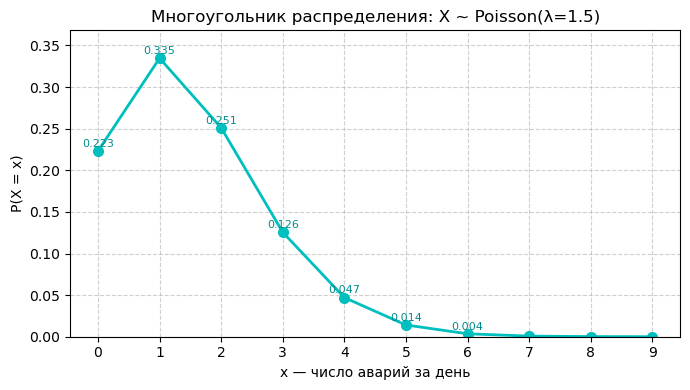

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

lmb = 1.5
X = np.arange(0, 10)
dist = poisson(lmb)
p = dist.pmf(X)

print("x:", " ".join(f"{x:2d}" for x in X))
print("p:", " ".join(f"{pi:6.4f}" for pi in p))

mean = dist.mean()
var = dist.var()
std = np.sqrt(var)

mode = int(np.floor(lmb))
if lmb == mode:
    mode = [mode - 1, mode]
else:
    mode = [mode]

print(f"\nM[X] = {mean:.4f}")
print(f"D[X] = {var:.4f}")
print(f"σ[X] = {std:.4f}")
print(f"Mo[X] = {mode}")

p_A = 1 - dist.pmf(0) - dist.pmf(1)
print(f"\nP(A) = P(X > 1) = {p_A:.6f}")

plt.figure(figsize=(7, 4))
plt.plot(X, p, 'co-', linewidth=2, markersize=7)
for x, pi in zip(X, p):
    if pi > 0.001:
        plt.text(x, pi + 0.005, f'{pi:.3f}', ha='center', fontsize=8, color='darkcyan')
plt.title('Многоугольник распределения: X ~ Poisson(λ=1.5)')
plt.xlabel('x — число аварий за день')
plt.ylabel('P(X = x)')
plt.xticks(X)
plt.ylim(0, max(p) * 1.1)
plt.grid(True, alpha=0.6, linestyle='--')
plt.tight_layout()
plt.show()